# CNN 연습
> Pytorch CNN (MNIST 3,7)

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: []

In [1]:
import torch
from fastai.vision.all import *

In [2]:
import graphviz

In [3]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

In [12]:
path=untar_data(URLs.MNIST_SAMPLE)

In [13]:
path.ls

<bound method Path.ls of Path('/home/csy/.fastai/data/mnist_sample')>

In [14]:
(path/'train').ls()

(#2) [Path('/home/csy/.fastai/data/mnist_sample/train/7'),Path('/home/csy/.fastai/data/mnist_sample/train/3')]

In [15]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

In [16]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

In [23]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [24]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)

In [25]:
X=X.reshape(12396,1,28,28)

In [26]:
c1=torch.nn.Conv2d(1,16,5)

In [57]:
c1(X).shape

torch.Size([12396, 16, 24, 24])

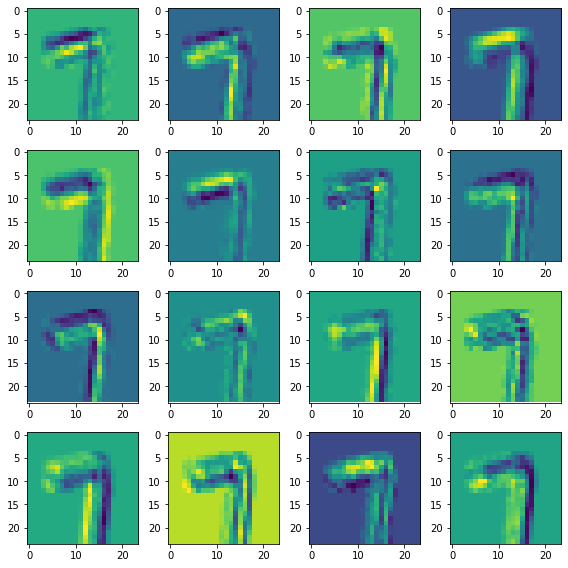

In [29]:
fig, axs = plt.subplots(4,4) 
k=0 
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(c1(X)[776][k].data) 
        k=k+1
fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()

In [30]:
m1=torch.nn.MaxPool2d(2)
m2=torch.nn.MaxPool2d(3)

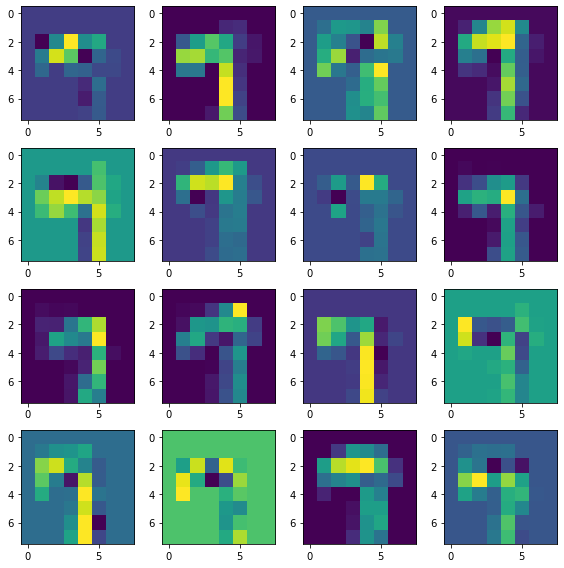

In [32]:
fig, axs = plt.subplots(4,4) 
k=0 
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(m2(c1(X))[776][k].data) 
        k=k+1
fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()    

In [33]:
a1=torch.nn.ReLU()

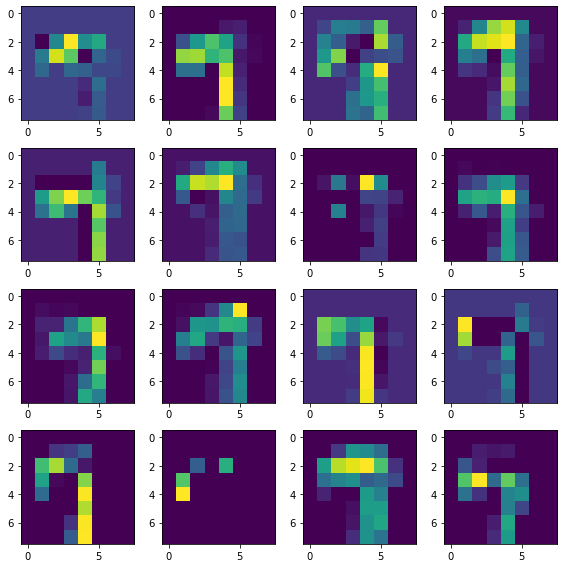

In [35]:
fig, axs = plt.subplots(4,4) 
k=0 
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(a1(m2(c1(X)))[776][k].data) 
        k=k+1
fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()    

In [36]:
l1=torch.nn.Linear(in_features=2304,out_features=1) 

In [37]:
l2=torch.nn.Linear(in_features=1024,out_features=1) 

In [38]:
a2=torch.nn.Sigmoid() 
a2(l1(a1(m1(c1(X))).reshape(12396,-1)))
a2(l2(a1(m2(c1(X))).reshape(12396,-1)))

tensor([[0.4429],
        [0.4712],
        [0.4768],
        ...,
        [0.4988],
        [0.4713],
        [0.4713]], grad_fn=<SigmoidBackward0>)

In [40]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(12396,-1)

In [41]:
flatten=Flatten()

In [45]:
net = nn.Sequential(
    c1, # 컨볼루션(선형)
    m1, # 맥스풀링(비선형) -- 효과? 이미지를 계층적으로 파악할 수 있게함 
    a1, # 렐루(비선형) 
    
#    a1(m1(c1(X))).reshape(12396,-1), ## 이걸 구현해야하는데?? 
    
    l1) 
## 마지막의 a2는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 


In [42]:
net1 = nn.Sequential(
    c1, # 컨볼루션(선형)
    m1, # 맥스풀링(비선형) -- 효과? 이미지를 계층적으로 파악할 수 있게함 
    a1, # 렐루(비선형) 
    flatten,#    a1(m1(c1(X))).reshape(12396,-1), ## 이걸 구현해야하는데?? 
    l1) 
## 마지막의 a2는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

In [43]:
net2 = nn.Sequential(
    c1, # 컨볼루션(선형)
    m2, # 맥스풀링(비선형) -- 효과? 이미지를 계층적으로 파악할 수 있게함 
    a1, # 렐루(비선형) 
    flatten,#    a1(m1(c1(X))).reshape(12396,-1), ## 이걸 구현해야하는데?? 
    l2) 
## 마지막의 a2는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

In [46]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

In [48]:
for epoc in range(200): 
    ## 1 
    yhat1=net1(X)
    ## 2 
    loss=loss_fn(yhat1,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net1.zero_grad()

In [47]:
for epoc in range(200): 
    ## 1 
    yhat2=net2(X)
    ## 2 
    loss=loss_fn(yhat2,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net2.zero_grad()

In [49]:
ypred1=a2(yhat1.data)>0.5 

In [50]:
ypred2=a2(yhat2.data)>0.5 

In [51]:
sum(ypred1==y)/12396

tensor([0.9927])

In [52]:
sum(ypred2==y)/12396

tensor([0.9595])